In [1]:
import matplotlib
#matplotlib.use('GTK3Cairo')
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import subprocess

In [4]:
def read_medidas(path):
    with open(path, 'r') as f:
        lineas = f.readlines()
    tiempo = float(lineas[1])
    acc = float(lineas[3])
    prec = float(lineas[5])
    recall = float(lineas[7])
    return (tiempo, acc, prec, recall)

In [5]:
ejecutable = './tp2'
ks = [1,3,5,7,15,21,25,35]
train_path = 'exp/exp_3/train/train.50000.25000.csv'
test_path = 'exp/exp_3/test/test.50000.25000.csv'
out_path = 'exp/exp_3/test/res.50000.25000.csv.'
medidas_path = 'exp/exp_3/medidas/res.50000.25000.csv.'

In [7]:
for k in ks:
    
    proceso_2 = subprocess.Popen([ejecutable, '-m', str(0), '-o', out_path+str(2)+'.'+str(k), '-k', str(k),
    '-r', medidas_path+str(2)+'.'+str(k), '-l', str(0.03), '-u', str(0.1),  '-n',str(1)], stdout=subprocess.PIPE)  

    [output, error] = proceso_2.communicate()
    print(output)
    
    proceso_1 = subprocess.Popen([ejecutable, '-m', str(0), '-o', out_path+str(1)+'.'+str(k), '-k', str(k),
    '-r', medidas_path+str(1)+'.'+str(k), '-l', str(0.03), '-u', str(0.1)], stdout=subprocess.PIPE)  

    [output, error] = proceso_1.communicate()
    print(output)

b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.614012\nPrecision general\n0.623590\nRecall general\n0.611888\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.646221\nPrecision general\n0.646235\nRecall general\n0.646235\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.638099\nPrecision general\n0.655837\nRecall general\n0.633385\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.684352\nPrecision general\n0.686645\nRecall general\n0.683527\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998

In [8]:
tiempos = {1: [], 2: []}
acc = {1: [], 2: []}
prec = {1: [], 2: []}
recall = {1: [], 2: []}
for k in ks:
    for i in range(1,3):
        metrics = read_medidas(medidas_path+str(i)+'.'+str(k))
        tiempos[i].append(metrics[0])
        acc[i].append(metrics[1])
        prec[i].append(metrics[2])
        recall[i].append(metrics[3])

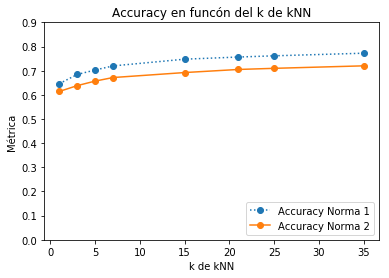

In [24]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(ks, acc[1], marker='o', linestyle = ':', label = "Accuracy Norma 1")
plt.plot(ks, acc[2], marker='o', linestyle = '-', label = "Accuracy Norma 2")
#plt.plot([z/110-10 for z in range(500,5000)], label = "x³/178")
plt.xlabel("k de kNN")
plt.ylabel("Métrica")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del k de kNN")
plt.legend(loc=4)
#plt.savefig("acc_normas"+".png")
plt.show()

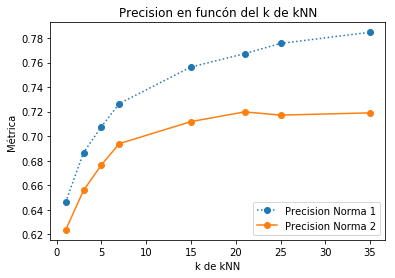

In [20]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(ks, prec[1], marker='o', linestyle = ':', label = "Precision Norma 1")
plt.plot(ks, prec[2], marker='o', linestyle = '-', label = "Precision Norma 2")
#plt.plot([z/110-10 for z in range(500,5000)], label = "x³/178")
plt.xlabel("k de kNN")
plt.ylabel("Métrica")
plt.title("Precision en funcón del k de kNN")
plt.legend(loc=4)
plt.savefig("prec_normas"+".png")
plt.show()

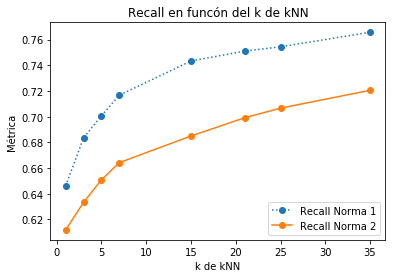

In [21]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(ks, recall[1], marker='o', linestyle = ':', label = "Recall Norma 1")
plt.plot(ks, recall[2], marker='o', linestyle = '-', label = "Recall Norma 2")
#plt.plot([z/110-10 for z in range(500,5000)], label = "x³/178")
plt.xlabel("k de kNN")
plt.ylabel("Métrica")
plt.title("Recall en funcón del k de kNN")
plt.legend(loc=4)
plt.savefig("recall_normas"+".png")
plt.show()

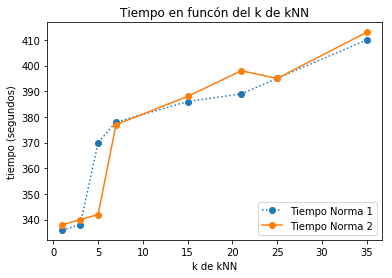

In [23]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(ks, tiempos[1], marker='o', linestyle = ':', label = "Tiempo Norma 1")
plt.plot(ks, tiempos[2], marker='o', linestyle = '-', label = "Tiempo Norma 2")
#plt.plot([z/110-10 for z in range(500,5000)], label = "x³/178")
plt.xlabel("k de kNN")
plt.ylabel("tiempo (segundos)")
plt.title("Tiempo en funcón del k de kNN")
plt.legend(loc=4)
plt.savefig("tiempo_normas"+".png")
plt.show()